In [19]:
import numpy as np
import cv2
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

#Importar Modelo!
Model = load_model('model.49-7.81.hdf5')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [20]:
cap = cv2.VideoCapture('VIDEO.mp4')
ret, frame = cap.read()

while True:
    ret, frame = cap.read()
    fault = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(fault, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img,
                                        scaleFactor=1.2,
                                        minNeighbors=5,
                                        minSize=(110, 110),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
    
    dimensions = (96, 96)
    faces_list=[]
    for (x, y, w, h) in faces:
        just_face=cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
        me  = np.array(just_face)/255.0
        x_test = np.expand_dims(me, axis=0)
        x_test = np.expand_dims(x_test, axis=3)
        y_test = Model.predict(x_test)
        for i in y_test:
            x = i[::2]
            y = i[1::2]
            c = tuple(zip(x, y))
            for j in range(len(c)):
                cv2.circle(just_face, c[j], 3, (255, 255, 255), -1)
    
    
    
    cv2.imshow('Mask Detection2',just_face)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()

#### Model Test_set

In [12]:
import pandas as pd
Data_test = 'test.csv'
df = pd.read_csv(Data_test)
data = pd.DataFrame(df)
data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


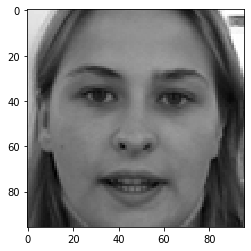

In [13]:
data['Image'] = data['Image'].apply(lambda i: np.fromstring(i, sep=' '))
img = (np.vstack(data['Image'].values)/255.0).astype(np.float32)
img = img.reshape(-1,96,96,1) #Reshape for 96x96 with one Channel

plt.imshow(img[8].reshape(96,96), cmap='gray')
plt.show()

In [17]:
prueba = img[8]
prueba_arr  = np.array(prueba)/255
img_test = np.expand_dims(prueba_arr, axis=0)
img_test = np.expand_dims(img_test, axis=3)

labels_test = Model.predict(img_test)
label_points = np.squeeze(labels_test)

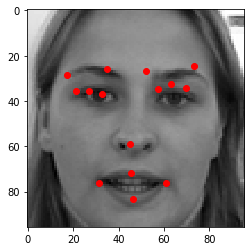

In [18]:
import matplotlib.pyplot as plt
Preds = Model.predict(img_test)
Preds = np.squeeze(Preds)

plt.imshow(img[8].reshape(96,96), cmap='gray')
plt.plot(Preds[::2], Preds[1::2], 'ro')
plt.show()